# Homework 3
DASC 522  
Richy Peterson

## Preamble

In [1]:
import sqlite3

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import scipy.stats as stats
import seaborn as sns

import statsmodels.api as sm

# for regression
import statsmodels.formula.api as smf
from sklearn import datasets
from statistics import mean

## Import Database

In [2]:
# Read database
my_connection=sqlite3.connect("weather_data-1.db")
my_cursor=my_connection.cursor()

## Section 1: Data Loading & Preparation


Get Table Names

In [3]:
query_result = my_cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(query_result.fetchall())

[('X_table',), ('y_table',)]


X_table

In [128]:
data_X = my_cursor.execute("SELECT * FROM X_table").fetchall()
X_column_names = []
for column in query_result.description:
    X_column_names.append(column[0])
df_X = pd.DataFrame(data_X, columns=X_column_names).drop(columns=['MONTH','DAY'],axis=1)
df_X.head()

MONTHDAY  HOUR  IF4PMTO7AM  DEWPOINTTEMPERATURE  SEALEVELPRESSURE  TEMP1  TEMP2  TEMP3  TEMP4  TEMP5  TEMP6  Record_ID
0       1.0     1           1                    3            1021.5      8      9     12     13     13     13          1
1       1.0     2           1                    3            1021.7      8      8      9     12     13     13          2
2       1.0     3           1                    3            1021.7      7      8      8      9     12     13          3
3       1.0     4           1                    3            1021.3      7      7      8      8      9     12          4
4       1.0     5           1                    3            1021.0      7      7      7      8      8      9          5

y_table

In [129]:
data_y = my_cursor.execute("SELECT * FROM Y_table").fetchall()
y_column_names = []
for column in query_result.description:
    y_column_names.append(column[0])
df_y = pd.DataFrame(data_y,columns=y_column_names)
df_y.head()

Record_ID  AIRTEMPERATURE
0      17163             -14
1      17162             -14
2      17043             -13
3      17040             -13
4       8705             -13

A. Use the df.merge() class method to merge the two dataframes on the "Record_ID" column, into a dataframe called df_new. Then, drop the "Record_ID" column

In [130]:
df_new = df_X.merge(df_y,on='Record_ID').drop('Record_ID',axis=1)
df_new.head()

MONTHDAY  HOUR  IF4PMTO7AM  DEWPOINTTEMPERATURE  SEALEVELPRESSURE  TEMP1  TEMP2  TEMP3  TEMP4  TEMP5  TEMP6  AIRTEMPERATURE
0       1.0     1           1                    3            1021.5      8      9     12     13     13     13               8
1       1.0     2           1                    3            1021.7      8      8      9     12     13     13               7
2       1.0     3           1                    3            1021.7      7      8      8      9     12     13               7
3       1.0     4           1                    3            1021.3      7      7      8      8      9     12               7
4       1.0     5           1                    3            1021.0      7      7      7      8      8      9               6

B. Split df_new into X & y dataframes, where y only contains the AIRTEMPERATURE feature

In [123]:
X = df_new.loc[:,df_new.columns != 'AIRTEMPERATURE']
X = sm.add_constant(X)
y = df_new.loc[:,df_new.columns == 'AIRTEMPERATURE']

## Section 2: Data Understanding / Modeling

A. Create a Data Understanding table & two python Data Understanding visualizations such as a scatterplot, histogram, pairplot, or correlation matrix.

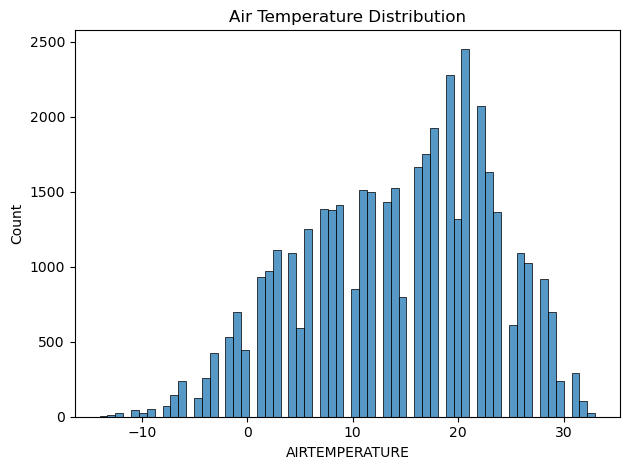

In [117]:
fig,ax = plt.subplots()
sns.histplot(y['AIRTEMPERATURE'],ax=ax)
ax.set_title('Air Temperature Distribution')
fig.tight_layout()

    Airtemperature distribution is not quite normal, but resembles normal with a spike at 20 deg.

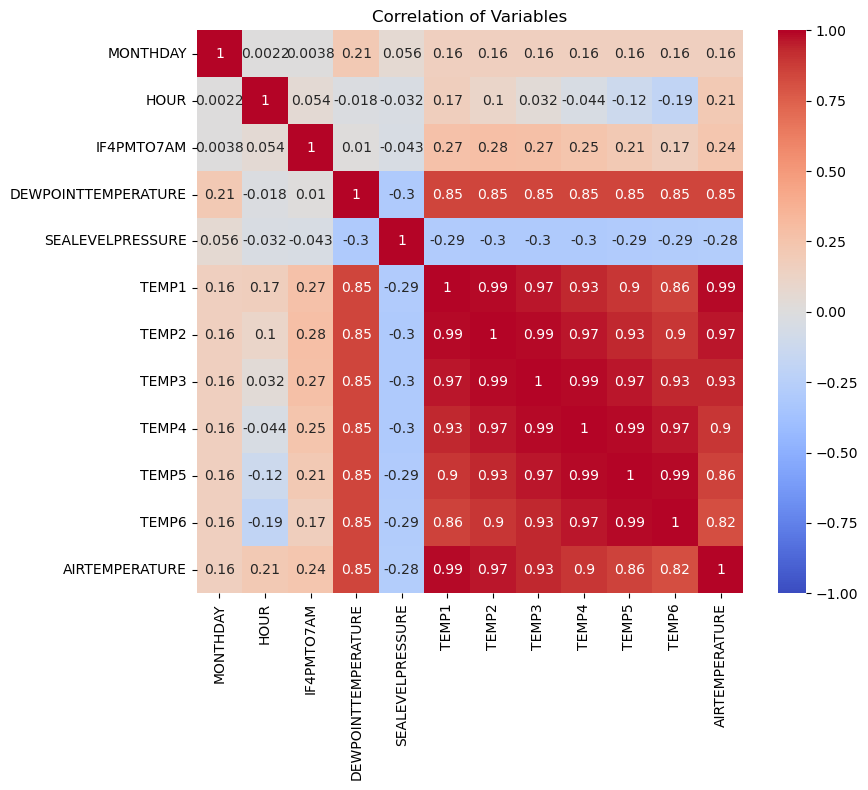

In [118]:
fig,ax = plt.subplots(figsize=(9,8))
sns.heatmap(df_new.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation of Variables')
fig.tight_layout()

    The prior temperatures are the highest correlated variables to the AIRTEMPERATURE, as well as to each other. The DEWPOINTTEMPERATURE is also highly correlated with all the temperatures, including AIRTEMPERATURE.

C:\Users\elder\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


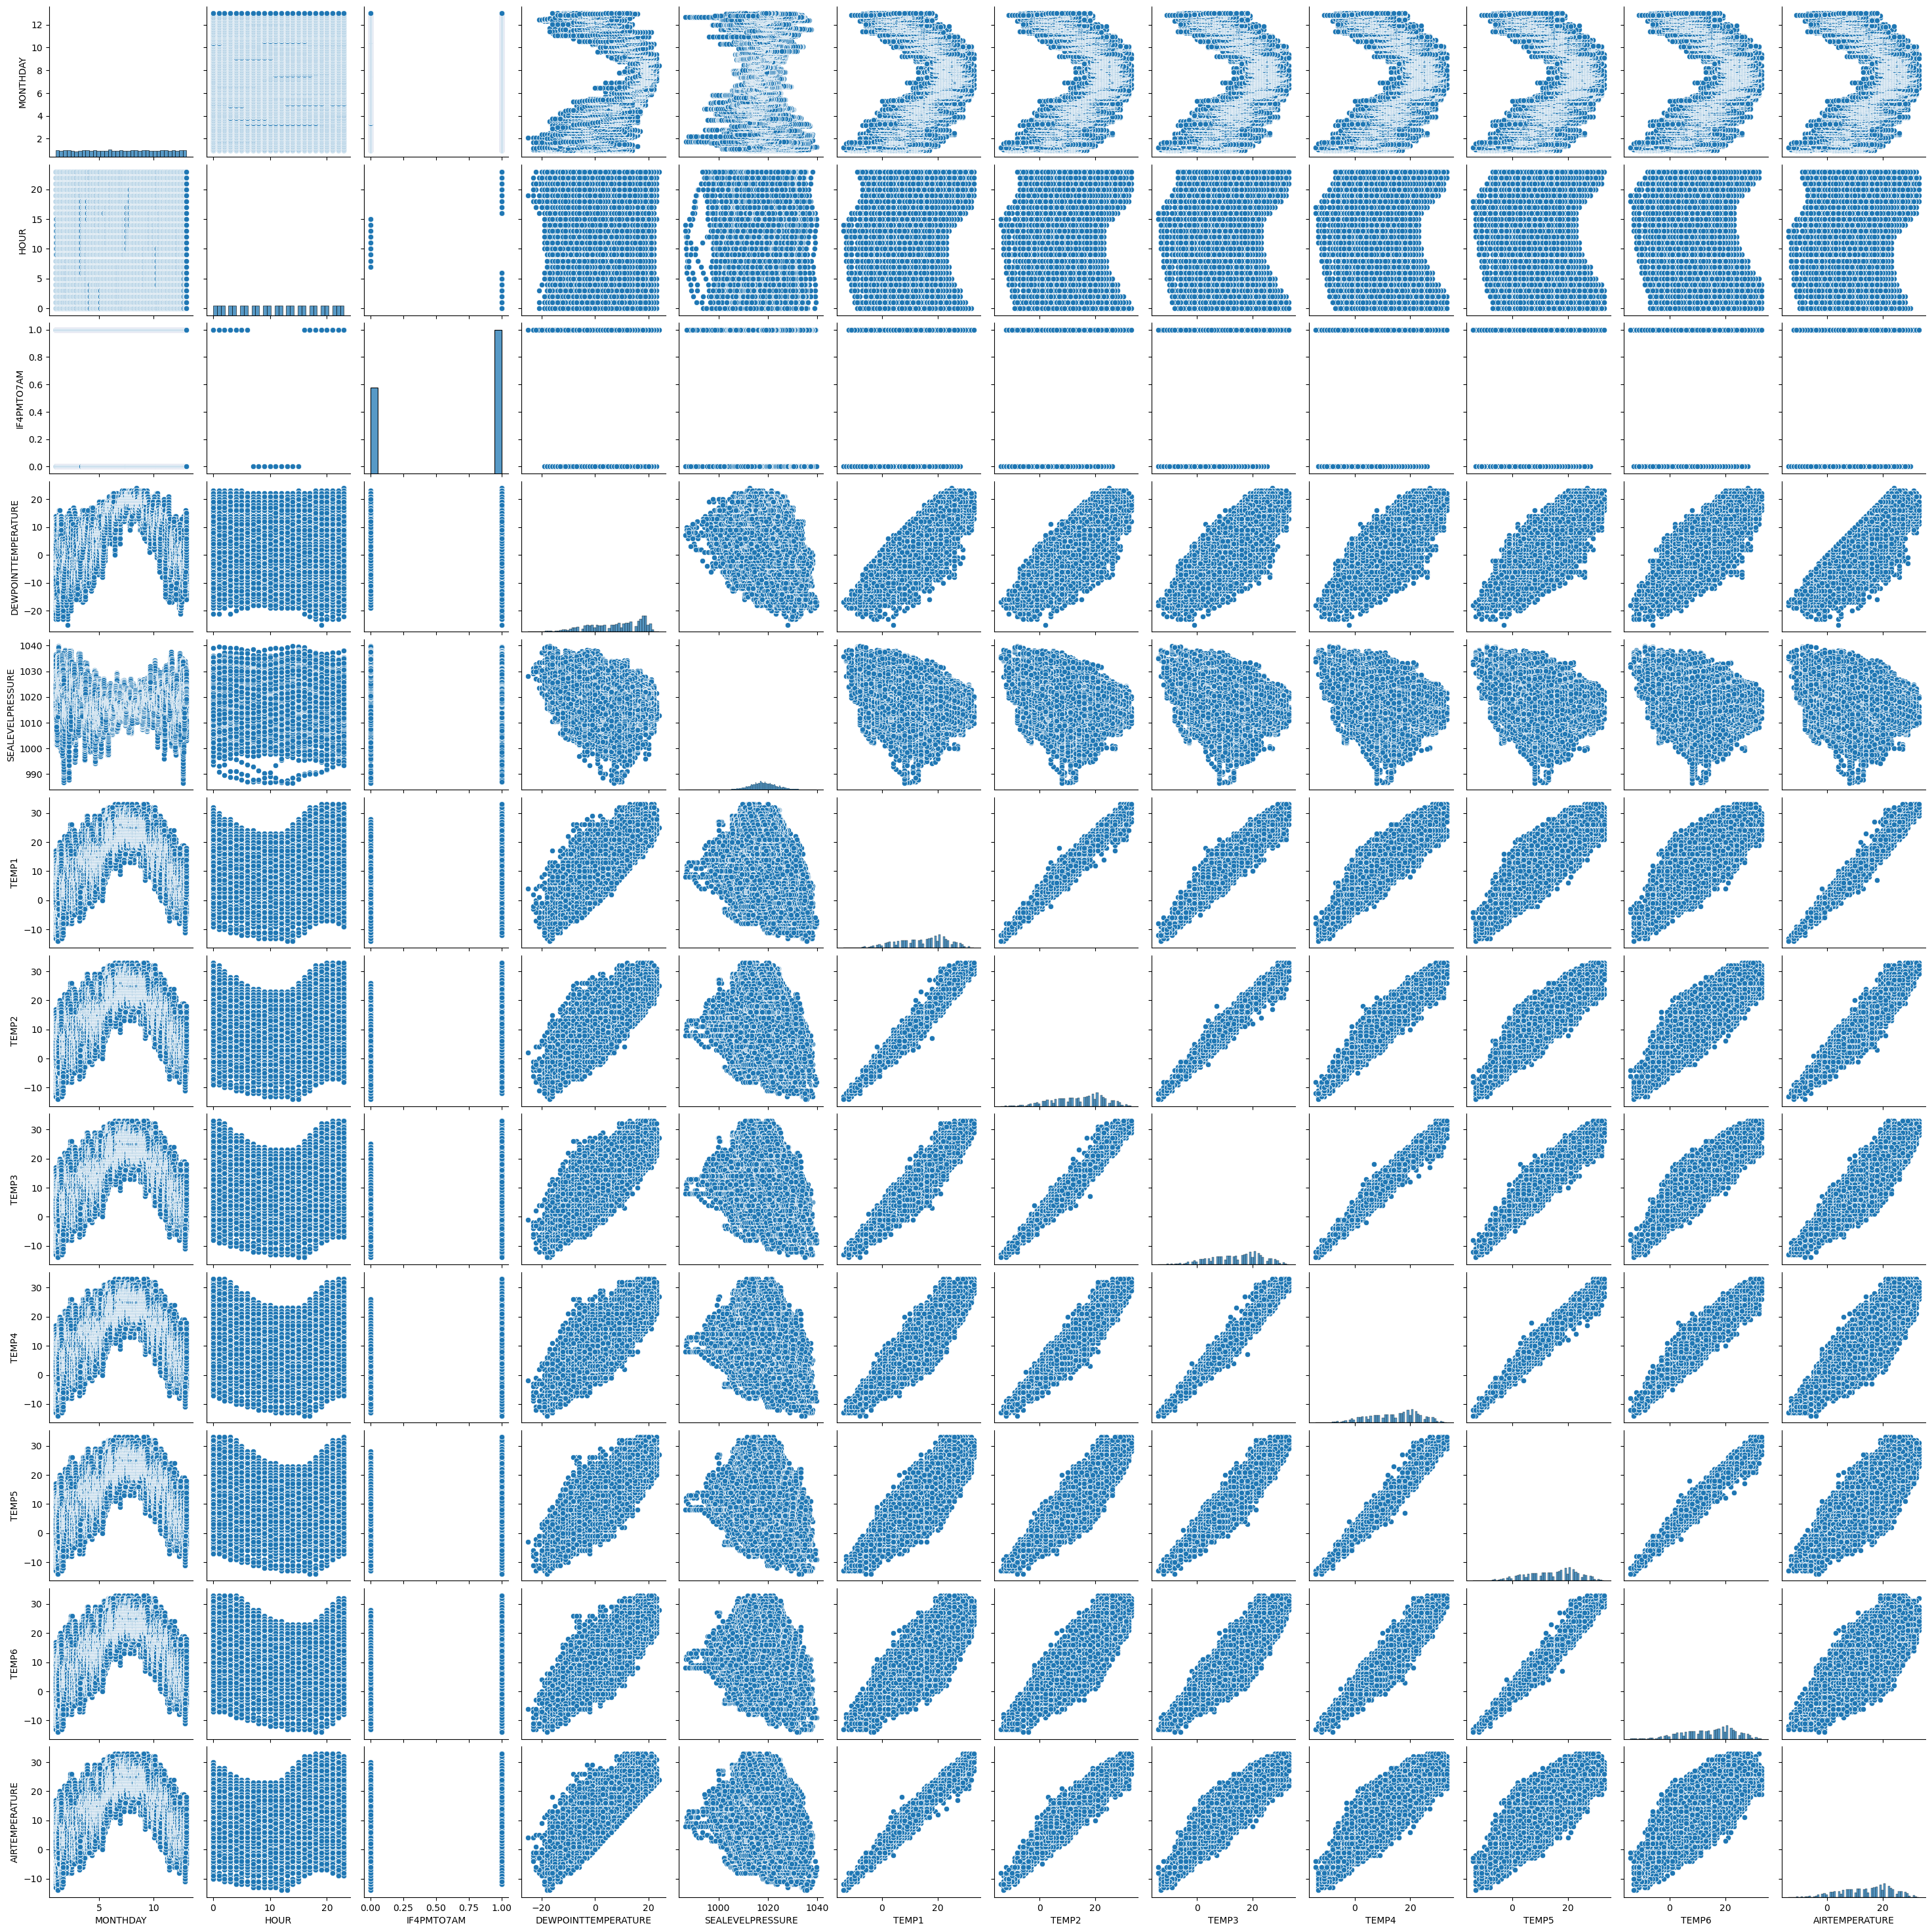

In [119]:
sns.pairplot(df_new)
plt.show()

    The pairplat show a linear relationship between all the temperatures. 

B. Full model: Model all variables using ols regression, and display a model summary

In [131]:
model_full = smf.ols('y ~ MONTHDAY + HOUR + IF4PMTO7AM + DEWPOINTTEMPERATURE + SEALEVELPRESSURE + TEMP1 + TEMP2 + TEMP3 + TEMP4 + TEMP5 + TEMP6', data=df_new).fit()

print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 2.492e+05
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:11:33   Log-Likelihood:                -64083.
No. Observations:               42277   AIC:                         1.282e+05
Df Residuals:                   42265   BIC:                         1.283e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -10.5103    

C. P-test selection: Use the p-test results to manually select the best variables. Display a model summary of the best p-test model.

    All the variables are significant with p < 0.001, lets take a closer look at the actual values.

In [132]:
# look at the p values
model_full.pvalues.sort_values(ascending=False)

TEMP6                   5.692232e-04
TEMP5                   2.648855e-05
MONTHDAY                8.747355e-08
TEMP4                   2.522319e-18
Intercept               1.090319e-27
SEALEVELPRESSURE        1.294433e-30
TEMP2                   4.678184e-34
IF4PMTO7AM              1.123046e-70
TEMP3                   4.819822e-74
HOUR                   2.715211e-117
DEWPOINTTEMPERATURE     0.000000e+00
TEMP1                   0.000000e+00
dtype: float64

    All p values are less than 0.001. There is no need to do any p-test selction.

D. AIC selection: Use the AIC analysis code to create a set of models. Display a model summary of the best AIC model.

In [133]:
# Create list of all variable combinations
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s,r) for r in range(1, len(s)+1))

var_comb_list = list(powerset(list(X.columns)))
var_comb_list = [list(row) for row in var_comb_list]

In [134]:
AIC_scores = pd.DataFrame(columns=['AIC'])
for i in range(len(var_comb_list)):
    AIC_scores.loc[i,'AIC'] = sm.OLS(y,X[var_comb_list[i]]).fit().aic

In [135]:
# look at the top 5 AIC scores
AIC_scores.sort_values(by='AIC',ascending=True).head()

AIC
4094  128190.582282
4082  128200.459817
4016  128204.372913
4083   128206.24202
4092  128217.223863

In [136]:
minidx = AIC_scores.astype('float').idxmin()
print(minidx)

AIC    4094
dtype: int64


In [137]:
model_aic = sm.OLS(y,X[var_comb_list[minidx['AIC']]]).fit()
print(model_aic.summary())

                            OLS Regression Results                            
Dep. Variable:         AIRTEMPERATURE   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 2.492e+05
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:13:34   Log-Likelihood:                -64083.
No. Observations:               42277   AIC:                         1.282e+05
Df Residuals:                   42265   BIC:                         1.283e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -10.5103    

    Notice that this is just the full model.

E. RFE selection: Use the "RFE iteration" code to find the minimum set of features that achieves score = 0.980. Display a model summary of the best RFE model

In [70]:
from sklearn.feature_selection import RFE
from sklearn import linear_model

model = linear_model.LinearRegression()

print("\nSearch the fewest features that achieve a score of 0.980")

for k in range(1, 11):
    # rfe = RFE(model, k)
    rfe = RFE(estimator = model, n_features_to_select = k)

    fit = rfe.fit(X, y) 

    f = fit.get_support(1) #the most important features

    # final_features = data[data.columns[f]] # final features: this gives wrong results
    final_features = X[X.columns[f]] # final features
    
    print("Num Features: %d" % fit.n_features_)
    print("Selected Features: %s" % final_features.columns)
    print("Score: %2.3f" % fit.score(X,y))
    print("----------")
    if fit.score(X,y) >= 0.980:
        break


        


Search the fewest features that achieve a score of 0.980
Num Features: 1
Selected Features: Index(['TEMP1'], dtype='object')
Score: 0.977
----------
Num Features: 2
Selected Features: Index(['TEMP1', 'TEMP3'], dtype='object')
Score: 0.983
----------


    The score is greater than 0.980 with just a two features, TEMP1 and TEMP3

In [69]:
model_rfe = smf.ols('y ~ TEMP1 + TEMP3', data=df_new).fit()
print(model_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.208e+06
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        06:16:36   Log-Likelihood:                -66716.
No. Observations:               42277   AIC:                         1.334e+05
Df Residuals:                   42274   BIC:                         1.335e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3191      0.011     29.455      0.0

    With just two features the Adj R-squared and AIC scores are only slightly worse than the full model. This is a much simpler model though and does not have the strong multicolinearity.  
    Lets view how the score changes with more features

In [74]:
for k in range(1, 11):
    # rfe = RFE(model, k)
    rfe = RFE(estimator = model, n_features_to_select = k)

    fit = rfe.fit(X, y) 

    f = fit.get_support(1) #the most important features

    # final_features = data[data.columns[f]] # final features: this gives wrong results
    final_features = X[X.columns[f]] # final features
    
    print("Num Features: %d" % fit.n_features_)
    print("Selected Features: %s" % final_features.columns)
    print("Score: %2.3f" % fit.score(X,y))
    print("----------")

Num Features: 1
Selected Features: Index(['TEMP1'], dtype='object')
Score: 0.977
----------
Num Features: 2
Selected Features: Index(['TEMP1', 'TEMP3'], dtype='object')
Score: 0.983
----------
Num Features: 3
Selected Features: Index(['TEMP1', 'TEMP2', 'TEMP3'], dtype='object')
Score: 0.983
----------
Num Features: 4
Selected Features: Index(['TEMP1', 'TEMP2', 'TEMP3', 'TEMP4'], dtype='object')
Score: 0.983
----------
Num Features: 5
Selected Features: Index(['DEWPOINTTEMPERATURE', 'TEMP1', 'TEMP2', 'TEMP3', 'TEMP4'], dtype='object')
Score: 0.984
----------
Num Features: 6
Selected Features: Index(['HOUR', 'DEWPOINTTEMPERATURE', 'TEMP1', 'TEMP2', 'TEMP3', 'TEMP4'], dtype='object')
Score: 0.985
----------
Num Features: 7
Selected Features: Index(['HOUR', 'DEWPOINTTEMPERATURE', 'TEMP1', 'TEMP2', 'TEMP3', 'TEMP4', 'TEMP5'], dtype='object')
Score: 0.985
----------
Num Features: 8
Selected Features: Index(['HOUR', 'DEWPOINTTEMPERATURE', 'TEMP1', 'TEMP2', 'TEMP3', 'TEMP4', 'TEMP5', 'TEMP6'],

    Notice that there is only a slight increase in the score as more features are added, especially above 5 features, but even after just 2 features.  
    The features that do not contirbute to improving model performance are, in order of the lowest contribution: MONTHDAY, SEALEVELPRESSURE, TEMP6, TEMP5, HOUR, DEWPOINTTEMPERATURE, TEMP4, TEMP2

## Section 3: Model Evaluation


A. I have enhanced readability by using the template with text blocks & code blocks

B.200+ word evaluation of the modeling efforts:   
   
The purpose of the modeling efforts was to develop a model that could predict the current air temperature using previous temperatures and other weather data. This assignment focused on the feature selection portion of the model development. Prior to any feature selection, a few data preparation steps were taken. Most noteworthy is that the ‘MONTH’ and ‘DAY’ columns were dropped from the dataset because that information is combined in the ‘MONTHDAY’ column. The ‘Record_ID’ column was also dropped as it is record-keeping information.

Four methods were used to select features for model development: full model, p-test selection, AIC selection, and RFE selection. The full-model method used all features not dropped during the data preparation phase. The full-model result was an adjusted R2 of 0.985, and all features were significant with 99.9% confidence. 

The p-test selection method would have started with the full model results and removed the feature with the highest p-value that was not significant. This process would continue until all remaining features were significant. For this project, a significance level of α = 0.05 was used and since all features in the full model had a p-value < 0.001, no p-test selection was necessary. If the ‘MONTH’ and ‘DAY’ columns were not removed previously,  those features, along with ‘MONTHDAY’ have p-values greater than 0.05, and then p-test selection would be used to remove features.

The AIC selection method compared the AIC from models built with all possible combinations of features and selected the model with the lowest AIC. This result ended up being the full model as well. 

The last method used was RFE selection. RFE stands for Recursive Feature Elimination. This method takes the desired number of features as an input. The estimator initially uses all features and then removes the least important features one by one until the desired number of features is reached. In this project, the goal was to find the model with the least number of features that achieved a score, or adjusted R2, of 0.980. This was achieved with only two features, ‘TEMP1’ and ‘TEMP3’, with an adjusted R2 of 0.983. 

The full model, p-test selection, and AIC selection methods were all the same and had the highest adjusted R2. However, the RFE selection method found a much simpler model with only an almost equivalent adjusted R2. In many cases, the simpler model would be preferred. To determine which model is best validation should be used based on the desired purpose of the model. In this case, which one predicts better based on unseen data?

